<a href="https://colab.research.google.com/github/maggiemcc02/Summer2023_Codes/blob/main/PentagonMesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install FireDrake

In [ ]:
try:
  from firedrake import *
except ImportError:
  !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
  from firedrake import *

--2023-07-12 16:56:48--  https://fem-on-colab.github.io/releases/firedrake-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4468 (4.4K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.36K  --.-KB/s    in 0s      

2023-07-12 16:56:48 (37.2 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4468/4468]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/47113d2/rele

In [ ]:
from firedrake import *
import numpy as np

# Focus on The $x$ Solution

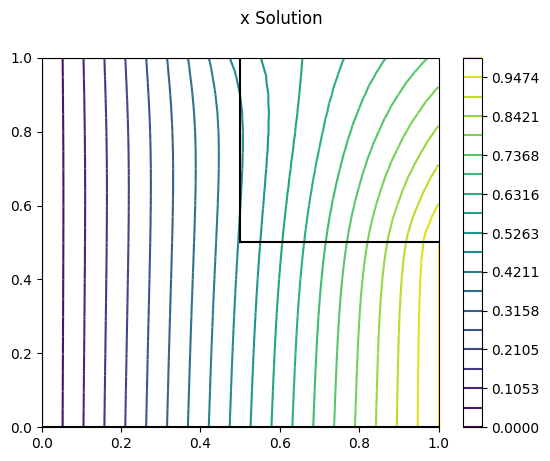

In [ ]:

# set the mesh

mesh = UnitSquareMesh(20, 20)

# set the function space - piecewise linear

V = FunctionSpace(mesh, "CG", 1)



# set the test and and trial functions

x_sol  = TrialFunction(V)
v_x = TestFunction(V)


# define the bilinear and linear forms

a_x = ( inner( grad(x_sol), grad(v_x) ) ) * dx

L_x = ( Constant(0) * v_x ) * dx



# Access the Mesh Coordinates


xi, eta = SpatialCoordinate(mesh)


# # Access the coordinates of the mesh as a Function object
# coordinates = mesh.coordinates

# # Extract the x and y values as separate NumPy arrays
# xi_values = coordinates.dat.data[:, 0]
# eta_values = coordinates.dat.data[:, 1]



# Set the Conditional Boundary Conditions

cond_top = conditional( xi <= 0.5 ,  xi, (1/2)*xi + (1/4)) # SIDE E
# f_top = Function(V)
# f_top.interpolate(cond_top)



cond_rhs= conditional( eta <= 0.5, Constant(1) , (-1/2)*eta + 5/4 ) # SIDE A and F
# f_rhs = Function(V)
# f_rhs.interpolate(cond_rhs)


cond_lhs= conditional( eta <= 0.5, Constant(0), Constant(0)) # SIDE C and D
# f_lhs = Function(V)
# f_lhs.interpolate(cond_lhs)



cond_bot= conditional( xi < 0.5, xi, xi) # SIDE B
# f_bot = Function(V)
# f_bot.interpolate(cond_bot)




# the conditions

bc1 =  DirichletBC(V, cond_lhs, 1)
bc2 = DirichletBC(V, cond_rhs, 2)
bc3 = DirichletBC(V, cond_bot, 3)
bc4 = DirichletBC(V, cond_top, 4)

bcs = [ bc1, bc2, bc3, bc4]



# where to hold the solution

x_sol = Function(V)


# solve the problem


solve( a_x == L_x  , x_sol, bcs = bcs )


# solution_x = x_sol.vector().get_local() # As a Numpy array





# The Plots to Create an Outline of the L Shape

xi_try = np.linspace(1/2, 1, 100)

l1 = [1/2 for i in xi_try]


xi_try2 = np.linspace(0, 1, 100)

l2 = [0 for i in xi_try]


xi_try3 = np.linspace(0, 1/2, 100)

l3 = [1 for i in xi_try]




# Plotting the Solution


try:
    import matplotlib.pyplot as plt
except:
    warning("Matplotlib not imported")

try:

    fig, axes = plt.subplots()

    levels = np.linspace(0,1, 20)


    contours = tricontour(x_sol,  axes = axes, levels = levels) # The level curves for the solution

    # Outline of the L :

    plt.plot(xi_try, l1, 'k')
    plt.plot(xi_try2, l2, 'k')
    plt.plot(xi_try3, l3, 'k')

    plt.plot(l1, xi_try, 'k')
    plt.plot(l2, xi_try2, 'k')



    fig.colorbar(contours)
    fig.suptitle("x Solution")



except Exception as e:
    warning('Cannot plot figure. Error msg "%s"' %e)


try:
    plt.show()

except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" %e)



# Focus on The $y$ Solution

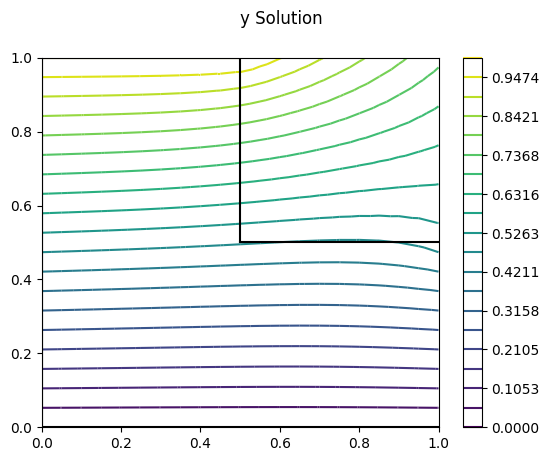

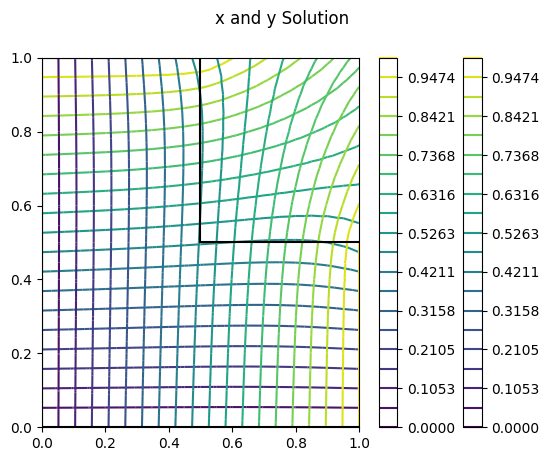

In [ ]:

# # set the mesh

# mesh = UnitSquareMesh(49, 49)

# # set the function space - piecewise linear

# V = FunctionSpace(mesh, "CG", 1)



# set the test and and trial functions

y_sol  = TrialFunction(V) # kinda like a symbolic sympy function used to declare the pde
v_y = TestFunction(V) # the symbolic test function



# define the bilinear and linear forms

a_y = ( inner( grad(y_sol), grad(v_y) ) ) * dx

L_y = Constant(0) * v_y * dx



# Define the conditional


xi, eta = SpatialCoordinate(mesh)



# # Access the coordinates of the mesh as a Function object
# coordinates = mesh.coordinates
# # Extract the x and y values as separate NumPy arrays
# xi_values = coordinates.dat.data[:, 0]
# eta_values = coordinates.dat.data[:, 1]




cond_top = conditional( xi <= 0.5, Constant(1), (-1/2)*xi + 5/4)
# f_top = Function(V)
# f_top.interpolate(cond_top)



cond_rhs= conditional( eta <= 0.5, eta, (1/2)*eta+ 1/4)
# f_rhs = Function(V)
# f_rhs.interpolate(cond_rhs)


cond_lhs= conditional( eta <= 0.5, eta, eta)
# f_lhs = Function(V)
# f_lhs.interpolate(cond_lhs)

cond_bot= conditional( xi <=  0.5 , Constant(0), Constant(0))
# f_bot = Function(V)
# f_bot.interpolate(cond_bot)





# the conditions

bc1 =  DirichletBC(V, cond_lhs, 1)
bc2 = DirichletBC(V, cond_rhs, 2)
bc3 = DirichletBC(V, cond_bot, 3)
bc4 = DirichletBC(V, cond_top, 4)

bcs = [ bc1, bc2, bc3, bc4]



# where to hold the solution

y_sol = Function(V)


# solve the problem


solve( a_y == L_y , y_sol, bcs = bcs )



# solution_y = y_sol.vector().get_local()




# CREATING THE L SHAPE OUTLINE

x_try = np.linspace(1/2, 1, 100)

l1 = [1/2 for i in x_try]


x_try2 = np.linspace(0, 1, 100)

l2 = [0 for i in x_try]


x_try3 = np.linspace(0, 1/2, 100)

l3 = [1 for i in x_try]





try:
    import matplotlib.pyplot as plt
except:
    warning("Matplotlib not imported")

try:

    fig, axes = plt.subplots()
    levels = np.linspace(0, 1, 20)
    contours = tricontour(y_sol,  axes = axes, levels = levels)

    # Creating the L Outline


    plt.plot(x_try, l1, 'k')
    plt.plot(x_try2, l2, 'k')
    plt.plot(x_try3, l3, 'k')
    plt.plot(l1, x_try, 'k')
    plt.plot(l2, x_try2, 'k')



    fig.colorbar(contours)
    fig.suptitle("y Solution")



except Exception as e:
    warning('Cannot plot figure. Error msg "%s"' %e)

try:
    plt.show()

except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" %e)



print()
print()

try:

    fig, axes = plt.subplots()
    levels = np.linspace(0, 1, 20)
    contours_y = tricontour(y_sol,  axes = axes, levels = levels)
    contours_x = tricontour(x_sol,  axes = axes, levels = levels)


    # creating the L outline

    plt.plot(x_try, l1, 'k')
    plt.plot(x_try2, l2, 'k')
    plt.plot(x_try3, l3, 'k')
    plt.plot(l1, x_try, 'k')
    plt.plot(l2, x_try2, 'k')



    fig.colorbar(contours_y)
    fig.colorbar(contours_x)
    fig.suptitle("x and y Solution")



except Exception as e:
    warning('Cannot plot figure. Error msg "%s"' %e)


try:
    plt.show()

except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" %e)



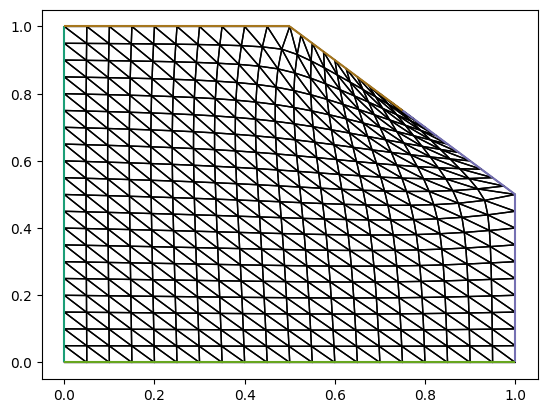

In [ ]:
N = np.shape(x_sol.dat.data)[0]
mesh_values = np.zeros([N,2])
mesh_values[:,0] = x_sol.dat.data
mesh_values[:,1] = y_sol.dat.data
mesh.coordinates.dat.data[:] = mesh_values
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
# plt.plot(3/4, 3/4, marker = "*", markersize = 10, color = 'y')
# plt.plot(1/2, 1, marker = "*", markersize = 10, color = 'y')
# plt.plot(1, 1/2, marker = "*", markersize = 10, color = 'y')